In [1]:
import euroleague as e
import matplotlib.pyplot as plt

# Get data

In [2]:
# fetch teams stats data using the euoleague module
seasons_rounds = {2018: 30, 2019: 16}
teams_stats = e.get_teams_stats(seasons_rounds)

# create a columns for highlighting Maccabi in plots
teams_stats['isMTA'] = teams_stats['team'] == 'MTA'
teams_stats['isMTAorFNR'] = teams_stats['team'].isin(['MTA', 'FNR'])

# create a subset of team_stats with only 2019/20 season data
teams_stats_2019 = teams_stats.loc[teams_stats['season'] == 2019]

# Compare win% to net rating

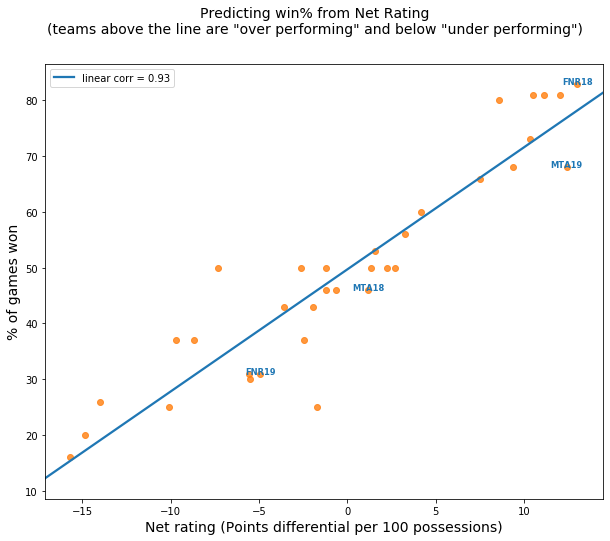

In [3]:
title_suffix = '\n(teams above the line are "over performing" and below "under performing")'
e.plot_bivariate(
    df=teams_stats, x='NETRtg', y='win_pct', hue='isMTAorFNR', fit_reg=True, text_size='small',
    suptitle='Predicting win% from Net Rating' + title_suffix, annotate_only_hue_true=True
);

# Plot teams rating

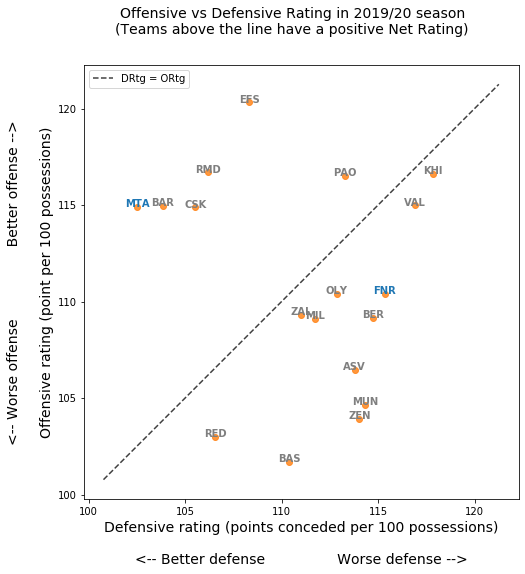

In [4]:
# plot offensive vs defensive rating in 2019/20 using plot_bivariate function
title_suffix = '\n(Teams above the line have a positive Net Rating)'
xlabel_suffix = '\n\n<-- Better defense\t\t\t\tWorse defense -->'.replace('\t', '    ')
ylabel_prefix = '<-- Worse offense\t\t\t\tBetter offense -->\n\n'.replace('\t', '    ')

fig, ax = e.plot_bivariate(
    df=teams_stats_2019, x='DRtg', y='ORtg', hue='isMTAorFNR', xyline=True, show_season=False,
    suptitle='Offensive vs Defensive Rating in 2019/20 season' + title_suffix
);
ax.set_xlabel(ax.get_xlabel() + xlabel_suffix); 
ax.set_ylabel(ylabel_prefix + ax.get_ylabel());

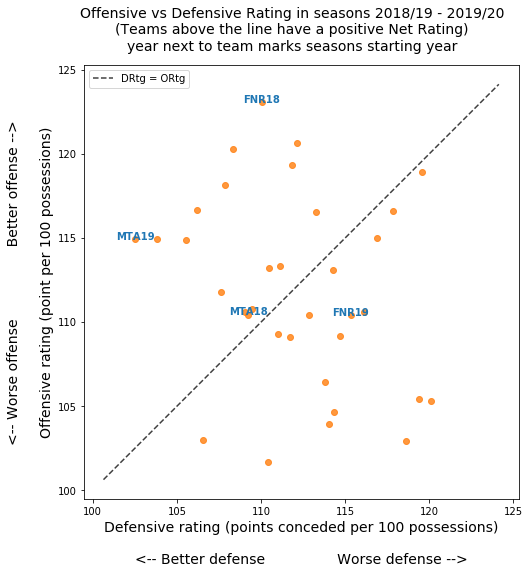

In [5]:
# plot offensive vs defensive rating in 2018/19-2019/20 using plot_bivariate function
title_suffix2 = '\nyear next to team marks seasons starting year'
fig, ax = e.plot_bivariate(
    df=teams_stats, x='DRtg', y='ORtg', hue='isMTAorFNR', xyline=True, annotate_only_hue_true=True,
    suptitle='Offensive vs Defensive Rating in seasons 2018/19 - 2019/20' + title_suffix + title_suffix2
);
ax.set_xlabel(ax.get_xlabel() + xlabel_suffix); 
ax.set_ylabel(ylabel_prefix + ax.get_ylabel());

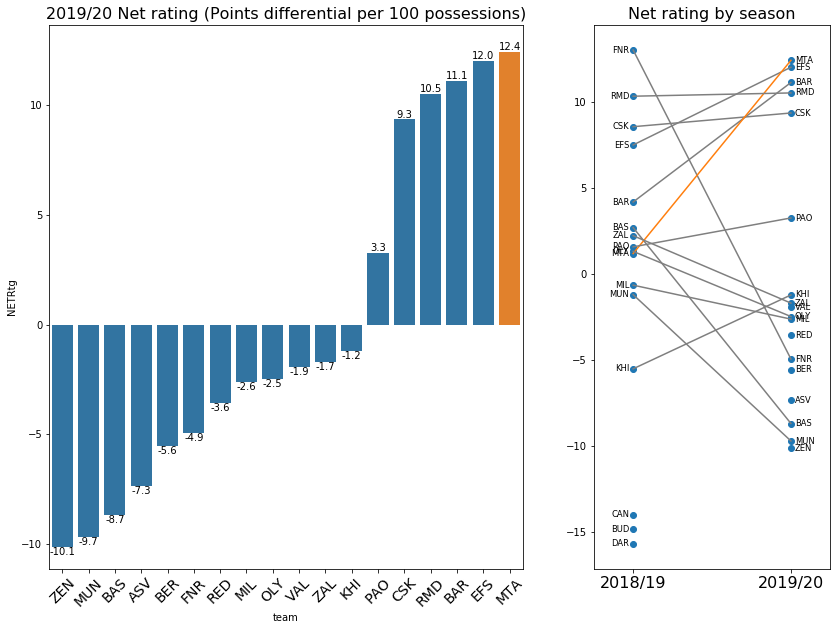

In [6]:
# plot net rating for teams in 2019/20 using sorted_barplot function
# and compare to previous year's net rating using plot_parallel_pairs function
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 10), gridspec_kw={'width_ratios': [2, 1]})

e.sorted_barplot(df=teams_stats_2019, metric='NETRtg', ax=ax0, show_season=False);
ax0.set_title('2019/20 ' + ax0.get_title(), fontsize=16);

e.plot_parallel_pairs(df=teams_stats, metric='NETRtg', ax=ax1)
ax1.set_title('Net rating by season', fontsize=16);


# Pace effects

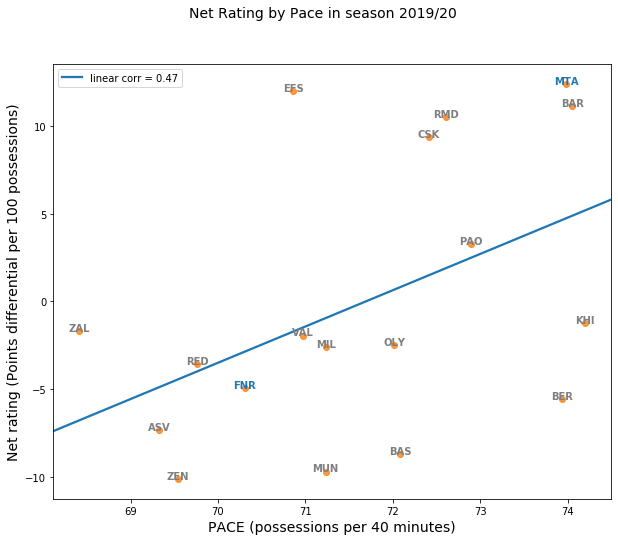

In [7]:
e.plot_bivariate(
    df=teams_stats_2019, x='PACE', y='NETRtg', hue='isMTAorFNR', fit_reg=True, show_season=False,
    suptitle='Net Rating by Pace in season 2019/20'
);

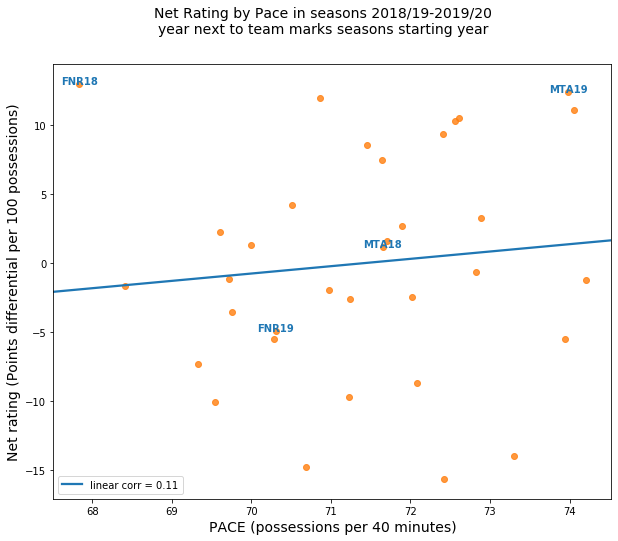

In [8]:
fig, ax = e.plot_bivariate(
    df=teams_stats, x='PACE', y='NETRtg', hue='isMTAorFNR',
    fit_reg=True, annotate_only_hue_true=True,
    suptitle='Net Rating by Pace in seasons 2018/19-2019/20' + title_suffix2
);
ax.legend(loc='lower left');